In [1]:
import argparse
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from write_script import get_ckpt_folder, get_epochs, mk_metrics_folder, mk_metrics_folder, get_experiment_folders_and_epochs
import matplotlib.image as mpimg
from os import listdir
from os.path import isfile, join
import re

In [2]:
filename = '../checkpoint/NMT_epochs/IWSLT_sample_160000_new/w512/normal/metrics/epoch_10/results.pkl'
with open(filename, 'rb') as f:
    results = pickle.load(f)
details = results['details']

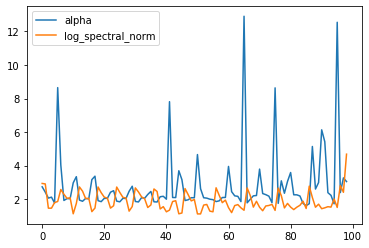

In [3]:
details[['alpha','log_spectral_norm']].plot()

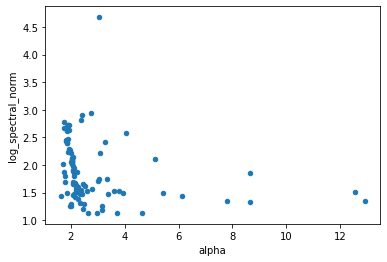

In [4]:
details[['alpha','log_spectral_norm']].plot.scatter(x='alpha',y='log_spectral_norm')

Text(0.5, 1.0, 'Alpha vs Log Spectral Norm\n../checkpoint/NMT_epochs/IWSLT_sample_160000_new/w512/normal/metrics/epoch_10/results.pkl')

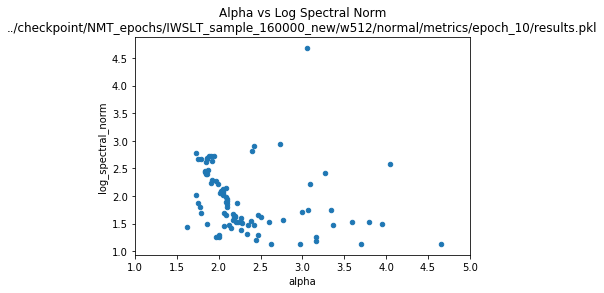

In [5]:
details[['alpha','log_spectral_norm']].plot.scatter(x='alpha',y='log_spectral_norm')
plt.xlim([1,5])
plt.title("Alpha vs Log Spectral Norm\n"+filename)


In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
details[details.log_spectral_norm>4]

,layer_id,name,D,M,N,W_scale,alpha,alpha_weighted,best_fit,bulk_max,bulk_min,entropy,has_esd,lambda_max,layer_type,log_alpha_norm,log_norm,log_spectral_norm,matrix_rank,max_rand_eval,mp_softrank,norm,num_evals,num_pl_spikes,num_spikes,rand_W_scale,rand_bulk_max,rand_bulk_min,rand_mp_softrank,rand_num_spikes,rand_sigma_mp,rank_loss,rf,sigma,sigma_mp,spectral_norm,stable_rank,sv_max,warning,xmax,xmin
98,334,None,0.059644,512.0,32805.0,0.098417,3.050108,14.28504,lognormal,120.612695,72.984144,0.129577,1.0,48245.077995,LAYER_TYPE.DENSE,14.28504,4.723133,4.683453,512.0,335.132,0.0025,52860.680863,512.0,313.0,3.0,0.098417,130.275565,78.831259,0.388729,1.0,0.998561,0.0,1.0,0.115879,0.960815,48245.077995,1.09567,219.647622,,48245.077995,6.207713


In [7]:
details

,layer_id,name,D,M,N,W_scale,alpha,alpha_weighted,best_fit,bulk_max,bulk_min,entropy,has_esd,lambda_max,layer_type,log_alpha_norm,log_norm,log_spectral_norm,matrix_rank,max_rand_eval,mp_softrank,norm,num_evals,num_pl_spikes,num_spikes,rand_W_scale,rand_bulk_max,rand_bulk_min,rand_mp_softrank,rand_num_spikes,rand_sigma_mp,rank_loss,rf,sigma,sigma_mp,spectral_norm,stable_rank,sv_max,warning,xmax,xmin
0,2,None,0.099024,512.0,51827.0,0.173769,2.737106,8.043243,truncated_power_law,15.586439,10.459506,0.827394,1.0,868.149045,LAYER_TYPE.EMBEDDING,8.643464,4.229327,2.938594,512.0,39.952054,0.017954,16956.144267,512.0,509.0,150.0,0.173769,40.085794,26.900152,1.003348,0.0,1.000722,0.0,1.0,0.076996,0.624010,868.149045,19.531375,29.464369,,868.149045,9.681486
1,4,None,0.053546,512.0,32805.0,0.192430,2.420952,7.043604,lognormal,14.595375,8.831831,0.874122,1.0,811.775850,LAYER_TYPE.EMBEDDING,7.412935,4.140724,2.909436,512.0,34.108894,0.017980,13826.865277,512.0,508.0,173.0,0.192430,34.233919,20.715343,1.003665,0.0,1.000866,0.0,1.0,0.063045,0.653515,811.775850,17.032861,28.491680,,811.775850,8.038774
2,21,None,0.077655,512.0,512.0,0.639359,2.066090,3.024400,truncated_power_law,9.808801,0.000000,0.845095,1.0,29.095604,LAYER_TYPE.DENSE,4.211084,3.097780,1.463827,512.0,9.664770,0.337123,1252.506797,512.0,186.0,29.0,0.639359,9.918815,0.000000,1.026286,0.0,1.006804,0.0,1.0,0.078170,1.001205,29.095604,43.047974,5.394034,,29.095604,1.599510
3,22,None,0.074135,512.0,512.0,0.633661,2.121618,3.107523,truncated_power_law,10.008182,0.000000,0.847697,1.0,29.153761,LAYER_TYPE.DENSE,4.284714,3.105556,1.464695,512.0,9.803129,0.343290,1275.134081,512.0,164.0,28.0,0.633661,10.101800,0.000000,1.030467,0.0,1.006993,0.0,1.0,0.087584,1.002316,29.153761,43.738237,5.399422,,29.153761,1.951937
4,23,None,0.081364,512.0,512.0,0.508600,1.771089,3.188297,truncated_power_law,14.899477,0.000000,0.754590,1.0,63.123346,LAYER_TYPE.DENSE,4.427299,3.296518,1.800190,512.0,15.192686,0.236038,1979.327788,512.0,254.0,36.0,0.508600,15.683224,0.000000,1.032288,0.0,1.007080,0.0,1.0,0.048382,0.981593,63.123346,31.356509,7.945020,over-trained,63.123346,0.797799
5,24,None,0.067548,512.0,512.0,0.497653,8.650363,16.109565,lognormal,15.597610,0.000000,0.754974,1.0,72.828139,LAYER_TYPE.DENSE,16.299204,3.315416,1.862299,512.0,15.936498,0.214170,2067.360554,512.0,19.0,37.0,0.497653,16.380888,0.000000,1.027885,0.0,1.007084,0.0,1.0,1.755114,0.982711,72.828139,28.386837,8.533940,under-trained,72.828139,40.653474
6,28,None,0.054820,512.0,2048.0,0.365128,4.044332,10.421854,lognormal,5.761193,0.640133,0.773086,1.0,377.488600,LAYER_TYPE.DENSE,10.446319,3.584381,2.576904,512.0,16.628629,0.015262,3840.436326,512.0,20.0,51.0,0.365128,16.863618,1.873735,1.014132,0.0,0.999606,0.0,1.0,0.680733,0.584265,377.488600,10.173648,19.429066,,377.488600,61.582025
7,29,None,0.048168,512.0,2048.0,0.366868,1.923718,4.413971,truncated_power_law,6.142495,0.682499,0.834086,1.0,197.015252,LAYER_TYPE.DENSE,5.100990,3.580251,2.294500,512.0,16.529410,0.031178,3804.095131,512.0,368.0,91.0,0.366868,16.749866,1.861096,1.013337,0.0,1.000976,0.0,1.0,0.048152,0.606164,197.015252,19.308633,14.036212,over-trained,197.015252,1.617405
8,42,None,0.062206,512.0,512.0,0.586981,2.036415,4.177016,truncated_power_law,11.117676,0.000000,0.735898,1.0,112.502244,LAYER_TYPE.DENSE,4.844461,3.172022,2.051161,512.0,11.466191,0.098822,1486.010151,512.0,207.0,21.0,0.586981,11.785927,0.000000,1.027885,0.0,1.007572,0.0,1.0,0.072036,0.978591,112.502244,13.208716,10.606707,,112.502244,1.141165
9,43,None,0.064531,512.0,512.0,0.581504,2.029509,4.229642,truncated_power_law,11.316692,0.000000,0.734652,1.0,121.358997,LAYER_TYPE.DENSE,4.843448,3.180164,2.084072,512.0,11.833168,0.093250,1514.132897,512.0,203.0,21.0,0.581504,11.995689,0.000000,1.013734,0.0,1.007014,0.0,1.0,0.072257,0.978099,121.358997,12.476478,11.016306,,121.358997,1.166889


In [8]:
details.alpha_weighted.mean()

5.066136770138813

In [9]:
details[details.log_spectral_norm<4].alpha_weighted.mean()

4.972066334065971

In [10]:
details[(details.log_spectral_norm<4) & (details.alpha < 5)].alpha_weighted.mean()

4.280174908575139

In [27]:
filename = '../checkpoint/NMT_epochs/IWSLT_sample_160000_new/w512/normal/metrics/epoch_10/results_raw_alphas.pkl'
with open(filename, 'rb') as f:
    results = pickle.load(f)
new_alphas = results['alphas']
new_alpha_hat = results['alpha_hat']
new_spectral_norms = results['spectral_norms']

In [28]:
results.keys()

dict_keys(['alpha_hat', 'alphas', 'spectral_norms'])

In [42]:
details['new_alphas']=new_alphas
details['new_alpha_hat']=new_alpha_hat
details['new_spectral_norms']=new_spectral_norms

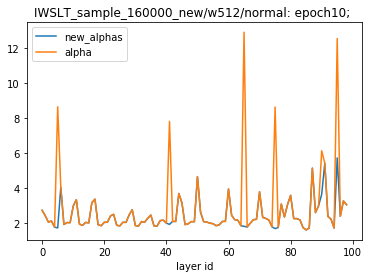

In [43]:
details.new_alphas.plot()
details.alpha.plot()


plt.title("IWSLT_sample_160000_new/w512/normal: epoch10; ")
plt.xlabel("layer id")
plt.legend()

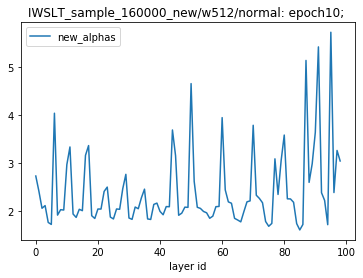

In [60]:
details.new_alphas.plot()


plt.title("IWSLT_sample_160000_new/w512/normal: epoch10; ")
plt.xlabel("layer id")
plt.legend()

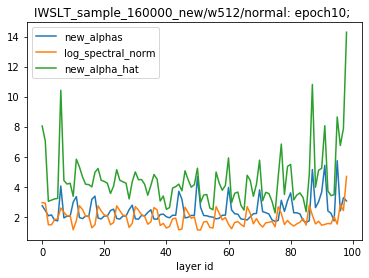

In [46]:
details.new_alphas.plot()
details.log_spectral_norm.plot()
details.new_alpha_hat.plot()


plt.title("IWSLT_sample_160000_new/w512/normal: epoch10; ")
plt.xlabel("layer id")
plt.legend()

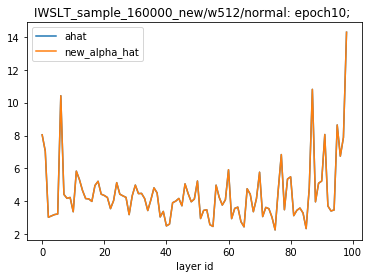

In [54]:
details['ahat']=details.new_alphas*details.log_spectral_norm
details['ahat'].plot()
details['new_alpha_hat'].plot()

plt.title("IWSLT_sample_160000_new/w512/normal: epoch10; ")
plt.xlabel("layer id")
plt.legend()

Text(0.5, 1.0, 'IWSLT_sample_160000_new/w512/normal: epoch10; ')

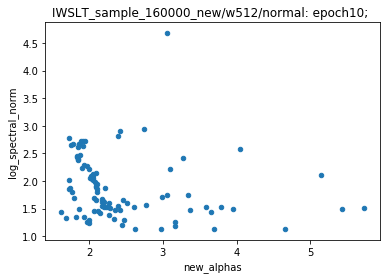

In [59]:
details.plot.scatter(x='new_alphas',y='log_spectral_norm')
plt.title("IWSLT_sample_160000_new/w512/normal: epoch10; ")
